In [2]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 18.4 MB/s 


In [3]:
import pydicom
import os
import matplotlib.pyplot as plt
import numpy as np
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

In [5]:
# Window Center와 Window Width 설정
window_center = -600
window_width = 1600

# Dicom 파일을 읽어오는 함수 -> pydicom.read_file() 또는 pydicom.dcmread()를 사용
slice = pydicom.read_file("./ID_0000_AGE_0060_CONTRAST_1_CT.dcm")
print(slice)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

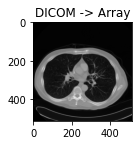

In [7]:
s = int(slice.RescaleSlope)
b = int(slice.RescaleIntercept)
image = s * slice.pixel_array +b

plt.subplot(1,3,1)
plt.title("DICOM -> Array")
plt.imshow(image, cmap='gray')
plt.show()

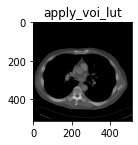

In [8]:
slice.WindowCenter = window_center
slice.WindowWidth = window_width
image = apply_modality_lut(image, slice)
image2 = apply_voi_lut(image, slice)
plt.subplot(1,3,2)
plt.title("apply_voi_lut")
plt.imshow(image2, cmap='gray')
plt.show()

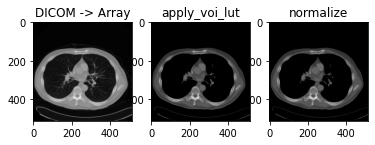

In [9]:
s = int(slice.RescaleSlope)
b = int(slice.RescaleIntercept)
image = s * slice.pixel_array +b

slice.WindowCenter = window_center
slice.WindowWidth = window_width
image = apply_modality_lut(image, slice)
image2 = apply_voi_lut(image, slice)

# normalization
image3 =np.clip(image, window_center - (window_width/2), window_center +(window_width/2))

plt.subplot(1,3,1)
plt.title("DICOM -> Array")
plt.imshow(image, cmap='gray')
plt.subplot(1,3,2)
plt.title("apply_voi_lut")
plt.imshow(image2, cmap='gray')
plt.subplot(1,3,3)
plt.title("normalize")
plt.imshow(image3, cmap='gray')
plt.show()